 #  classification - Iris dataset 

## Aidin Hosseini - 98103115

### tasks:
 1. Importing dataset
 1. Implementing linear classification
 1. Training MLP model
    1. Training MLP model with 1 hidden layer and 40 neurons
    1. Training MLP model with 1 hidden layers and 5 neurons
    1. Training MLP model with 2 hidden layers and 40 neurons in each layer
1. Decision Tree
1. AdaBoost
1. Majority and weighted voiting

### importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

## Importing Iris dataset
Cell below uses **datasets** from **sklearn** to get the iris dataset. Splits the dataset (test dataset size is 20%) using **train_test_split** from **sklearn.model_selection**. 

In [2]:
# importing iris dataset from sklearn
iris_dataset,iris_class = datasets.load_iris(return_X_y=True)
#spliting the dataset into train and test set
train_set, test_set, train_class, test_class = train_test_split(iris_dataset, iris_class, test_size=0.2,random_state=48)
# converting the dataset into dataframe
train_set_df = pd.DataFrame(train_set,columns=['sepal_length','sepal_width','petal_length','petal_width'])
train_class_df= pd.DataFrame(train_class,columns=['class'])

train_df = pd.concat([train_set_df,train_class_df],axis=1)
test_set_df = pd.DataFrame(test_set,columns=['sepal_length','sepal_width','petal_length','petal_width'])
test_class_df= pd.DataFrame(test_class,columns=['class'])

test_df = pd.concat([test_set_df,test_class_df],axis=1)
# printing the train and test set
print('train dataframe: ')
print(train_df.head())
print('\ntest dataframe: ')
print(test_df.head())

train dataframe: 
   sepal_length  sepal_width  petal_length  petal_width  class
0           6.5          3.2           5.1          2.0      2
1           5.6          2.5           3.9          1.1      1
2           6.2          3.4           5.4          2.3      2
3           5.1          3.4           1.5          0.2      0
4           5.5          2.3           4.0          1.3      1

test dataframe: 
   sepal_length  sepal_width  petal_length  petal_width  class
0           5.7          2.9           4.2          1.3      1
1           6.1          2.8           4.7          1.2      1
2           6.1          2.6           5.6          1.4      2
3           4.5          2.3           1.3          0.3      0
4           5.9          3.2           4.8          1.8      1


In [3]:
train_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [4]:
test_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Since there's no **Nan** values in the dataset, we don't need to preprocess the data.<br>
Dataframes are only used for visualization of the data. Implemented functions only use **numpy** arrays.

In [5]:
#normalize the data using StandardScaler
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)


In the above cell, data is normalized using **StandardScaler** from **sklearn.preprocessing**. This is done to prevent overflow in the sigmoid function and also for better results.

## Implementing single layer perceptron
&nbsp;&nbsp;In the next cell a single layer perceptron class is implemented for M class task. Its constructor only inputs are eta ,feature vectors, class labels and number of classes. Fit function is used to train the model. Also predict function is used to predict the labels of the datasets.<br>
&nbsp;&nbsp;Inputs of the constructor(training data and classes) have to be numpy ndarray. in the constructor bias(w0) and weigths for each class are initialized randomly.<br>
&nbsp;&nbsp;In the train function, only input is number of epochs. if the predicted label isn't correct the weights are updated using the following formula:<br>
$$w_{j}^{(t+1)} = w_{j}^{(t)} + \eta * x_{j}$$
respectivly the bias is updated using the following formula:<br>
$$w_{0,j}^{(t+1)} = w_{0,j}^{(t)} + \eta$$
after updating the weights and bias for the true label, the weights for the predicted label are updated using the following formula:<br>
$$w_{predicted}^{(t+1)} = w_{predicted}^{(t)} - \eta * x_{j}$$
respectivly the bias is updated using the following formula:<br>
$$w_{0,predicted}^{(t+1)} = w_{0,predicted}^{(t)} - \eta$$

&nbsp;&nbsp;In the predict_vector function, predicted label for a single data is returned. *Kesler's constrction* is used to predict the label. The data is assigned to label j if the following condition is true:<br>
$$w_{j}^{T} * x_{j} + w_{0,j} > w_{i}^{T} * x_{j} + w_{0,i}  \forall i \neq j$$
which is equal to:<br>
$$\underset{i}{\operatorname{\argmax}}(w_{i}^{T} * x_{j} + w_{0,i})$$
&nbsp;&nbsp; Finally in the predict function, predict_vector function is used to predict the labels for all the data.


In [6]:

class Perceptron:
    def __init__ (self,eta,X,y,M):
        self.eta = eta
        self.X = X
        self.y = y
        self.M = M
        self.w = np.random.rand(self.M,self.X.shape[1])
        self.w0 = np.random.rand(self.M)
    # training the perceptron for n epochs
    def train(self,n):
        for i in range(n):
            for j in range(self.X.shape[0]):
                y_pred = self.predict_vector(self.X[j])
                if y_pred != self.y[j]:
                    self.w[self.y[j]] = self.w[self.y[j]] + self.eta*self.X[j]
                    self.w0[self.y[j]] = self.w0[self.y[j]] + self.eta
                    self.w[y_pred] = self.w[y_pred] - self.eta*self.X[j]
                    self.w0[y_pred] = self.w0[y_pred] - self.eta
    # predicting the class of the input vector
    def predict_vector(self,x):
        y_pred = np.argmax(np.dot(self.w,x) + self.w0)
        return y_pred
    # predicting the classes of the input
    def predict(self,X):
        y_pred = np.array([])
        for i in range(X.shape[0]):
            y_pred = np.append(y_pred,self.predict_vector(X[i]))
        return y_pred


    

In [7]:
perceptron = Perceptron(0.01,train_set,train_class,3)
perceptron.train(10)
y_pred = perceptron.predict(test_set)

In [8]:
print('predicted classes: ')
print(y_pred)
print('\nactual classes: ')
print(test_class)


predicted classes: 
[1. 1. 1. 1. 2. 2. 0. 2. 0. 1. 2. 1. 0. 2. 1. 2. 0. 1. 1. 2. 0. 2. 2. 1.
 2. 0. 0. 2. 2. 1.]

actual classes: 
[1 1 2 0 1 2 0 2 0 1 2 0 0 2 1 1 0 1 1 2 0 2 1 1 2 0 0 2 2 1]


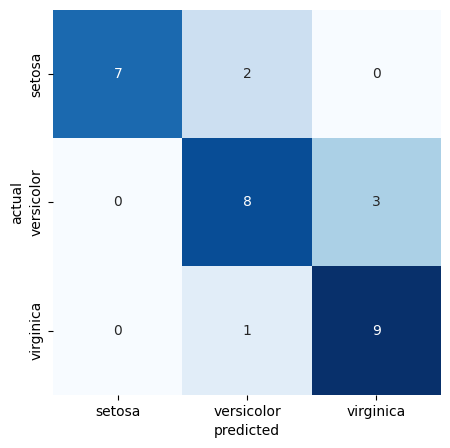

In [9]:
#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(test_class,y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_xticklabels(['setosa','versicolor','virginica'])
ax.set_yticklabels(['setosa','versicolor','virginica'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


In [10]:
print(classification_report(test_class,y_pred,target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      0.78      0.88         9
  versicolor       0.73      0.73      0.73        11
   virginica       0.75      0.90      0.82        10

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.81        30
weighted avg       0.82      0.80      0.80        30



- According to the results, data isn't linearly seperable. Therefore linear classifiers can't completely seperate the data. These classifiers are unable to understand the correlation between two features. which is a limiting factor when decision boundary is complex. Also Linear classifiers are sensitive to the scale of the data. Therefore it's needed to preprocess the data for better results.These are a con of linear classifiers. But the pro is that they have a low computational cost and easy to implement. They can handle high dimensional and large data easily due to their simplicity.<br>
- However in this case, perceptron algorithm has an acceptable accuracy. Setosa class is almost linearly seperable from the other two. But versicolor and virginica aren't linearly seperable from each other. Therefore precission and recall score is lower for these two classes.

## Training a MLP model
- Tensorflow library is used to train a MLP model.

In [11]:
import tensorflow as tf

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_set, train_class, epochs=250,verbose = 2)

Epoch 1/250
4/4 - 1s - loss: 1.4264 - accuracy: 0.3250 - 659ms/epoch - 165ms/step
Epoch 2/250
4/4 - 0s - loss: 1.3550 - accuracy: 0.3250 - 8ms/epoch - 2ms/step
Epoch 3/250
4/4 - 0s - loss: 1.2847 - accuracy: 0.3250 - 9ms/epoch - 2ms/step
Epoch 4/250
4/4 - 0s - loss: 1.2144 - accuracy: 0.3000 - 11ms/epoch - 3ms/step
Epoch 5/250
4/4 - 0s - loss: 1.1502 - accuracy: 0.2750 - 10ms/epoch - 2ms/step
Epoch 6/250
4/4 - 0s - loss: 1.0904 - accuracy: 0.3167 - 11ms/epoch - 3ms/step
Epoch 7/250
4/4 - 0s - loss: 1.0296 - accuracy: 0.3250 - 11ms/epoch - 3ms/step
Epoch 8/250
4/4 - 0s - loss: 0.9736 - accuracy: 0.4250 - 10ms/epoch - 2ms/step
Epoch 9/250
4/4 - 0s - loss: 0.9251 - accuracy: 0.6833 - 9ms/epoch - 2ms/step
Epoch 10/250
4/4 - 0s - loss: 0.8735 - accuracy: 0.7667 - 9ms/epoch - 2ms/step
Epoch 11/250
4/4 - 0s - loss: 0.8291 - accuracy: 0.7833 - 7ms/epoch - 2ms/step
Epoch 12/250
4/4 - 0s - loss: 0.7898 - accuracy: 0.8000 - 11ms/epoch - 3ms/step
Epoch 13/250
4/4 - 0s - loss: 0.7497 - accuracy: 0.

In [41]:
mlp_y_pred = model.predict(test_set)
mlp_y_pred = np.argmax(mlp_y_pred,axis=1)
print(classification_report(test_class,mlp_y_pred,target_names=['setosa','versicolor','virginica']))

1/1 [==============================] - 0s 50ms/step
              precision    recall  f1-score   support

      setosa       1.00      0.89      0.94         9
  versicolor       0.90      0.82      0.86        11
   virginica       0.83      1.00      0.91        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



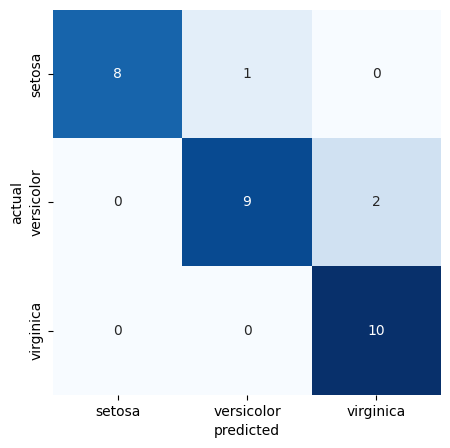

In [42]:
#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(test_class,mlp_y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_xticklabels(['setosa','versicolor','virginica'])
ax.set_yticklabels(['setosa','versicolor','virginica'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

- As it is shown above a MLP model is trained using tensorflow library. The model has 1 hidden layer containing 40 neurons. The activation function for the hidden layer is relu. The output layer has 3 neurons since there are 3 classes. The best activation function for the output layer is softmax which it's used in the model. The loss function is cross entropy. The optimizer is Adam. The model is trained for 250 epochs. Also the training data shuffles after each epoch.<br>
-  The MLP model has a better accuracy than SLP model because data isn't linearly seperable. In this case MLP model has better precision and recall score due to it's complex decision boundary.

### second MLP model with 5 neurons in the hidden layer

In [16]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_set, train_class, epochs=450, verbose = 2)

Epoch 1/450
4/4 - 0s - loss: 1.1957 - accuracy: 0.2917 - 477ms/epoch - 119ms/step
Epoch 2/450
4/4 - 0s - loss: 1.1807 - accuracy: 0.2750 - 11ms/epoch - 3ms/step
Epoch 3/450
4/4 - 0s - loss: 1.1666 - accuracy: 0.2750 - 10ms/epoch - 3ms/step
Epoch 4/450
4/4 - 0s - loss: 1.1516 - accuracy: 0.2833 - 9ms/epoch - 2ms/step
Epoch 5/450
4/4 - 0s - loss: 1.1382 - accuracy: 0.2917 - 11ms/epoch - 3ms/step
Epoch 6/450
4/4 - 0s - loss: 1.1240 - accuracy: 0.3083 - 8ms/epoch - 2ms/step
Epoch 7/450
4/4 - 0s - loss: 1.1108 - accuracy: 0.3500 - 9ms/epoch - 2ms/step
Epoch 8/450
4/4 - 0s - loss: 1.0971 - accuracy: 0.3500 - 10ms/epoch - 2ms/step
Epoch 9/450
4/4 - 0s - loss: 1.0852 - accuracy: 0.3833 - 8ms/epoch - 2ms/step
Epoch 10/450
4/4 - 0s - loss: 1.0722 - accuracy: 0.4083 - 8ms/epoch - 2ms/step
Epoch 11/450
4/4 - 0s - loss: 1.0604 - accuracy: 0.4333 - 8ms/epoch - 2ms/step
Epoch 12/450
4/4 - 0s - loss: 1.0486 - accuracy: 0.4417 - 8ms/epoch - 2ms/step
Epoch 13/450
4/4 - 0s - loss: 1.0367 - accuracy: 0.47

In [17]:
mlp_y_pred2 = model2.predict(test_set)
mlp_y_pred2 = np.argmax(mlp_y_pred2,axis=1)
print(classification_report(test_class,mlp_y_pred2,target_names=['setosa','versicolor','virginica']))

1/1 [==============================] - 0s 47ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.82      0.90        11
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



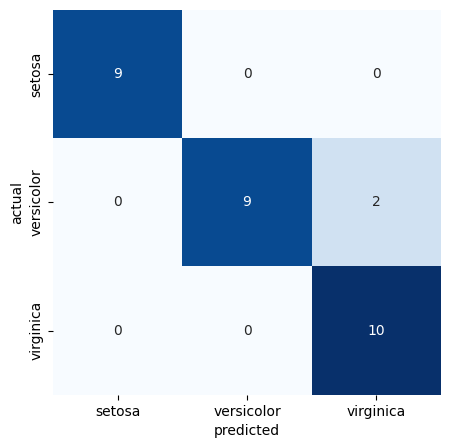

In [18]:
#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(test_class,mlp_y_pred2)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_xticklabels(['setosa','versicolor','virginica'])
ax.set_yticklabels(['setosa','versicolor','virginica'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

The second MLP model has 5 neurons instead of 40 in its only hidden layer. Because of that model was trained for 450 epochs. As it is shown above the accuracy, precision and recall of the second model is better compared to the first one. It seems that the first model is slightly overfitted. however training the model taks more time, because of the number of epochs.

### third MLP model with 2 hidden layers

In [19]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(train_set, train_class, epochs=200, verbose = 2)

Epoch 1/200
4/4 - 1s - loss: 0.9564 - accuracy: 0.7333 - 668ms/epoch - 167ms/step
Epoch 2/200
4/4 - 0s - loss: 0.8830 - accuracy: 0.8083 - 9ms/epoch - 2ms/step
Epoch 3/200
4/4 - 0s - loss: 0.8170 - accuracy: 0.8250 - 9ms/epoch - 2ms/step
Epoch 4/200
4/4 - 0s - loss: 0.7566 - accuracy: 0.8250 - 10ms/epoch - 2ms/step
Epoch 5/200
4/4 - 0s - loss: 0.6986 - accuracy: 0.8250 - 15ms/epoch - 4ms/step
Epoch 6/200
4/4 - 0s - loss: 0.6467 - accuracy: 0.8250 - 12ms/epoch - 3ms/step
Epoch 7/200
4/4 - 0s - loss: 0.5983 - accuracy: 0.8250 - 12ms/epoch - 3ms/step
Epoch 8/200
4/4 - 0s - loss: 0.5575 - accuracy: 0.8250 - 12ms/epoch - 3ms/step
Epoch 9/200
4/4 - 0s - loss: 0.5202 - accuracy: 0.8167 - 8ms/epoch - 2ms/step
Epoch 10/200
4/4 - 0s - loss: 0.4863 - accuracy: 0.8250 - 11ms/epoch - 3ms/step
Epoch 11/200
4/4 - 0s - loss: 0.4569 - accuracy: 0.8250 - 10ms/epoch - 3ms/step
Epoch 12/200
4/4 - 0s - loss: 0.4299 - accuracy: 0.8250 - 10ms/epoch - 2ms/step
Epoch 13/200
4/4 - 0s - loss: 0.4073 - accuracy: 

In [20]:
mlp_y_pred3 = model3.predict(test_set)
mlp_y_pred3 = np.argmax(mlp_y_pred3,axis=1)
print(classification_report(test_class,mlp_y_pred3,target_names=['setosa','versicolor','virginica']))

1/1 [==============================] - 0s 53ms/step
              precision    recall  f1-score   support

      setosa       1.00      0.89      0.94         9
  versicolor       0.90      0.82      0.86        11
   virginica       0.83      1.00      0.91        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



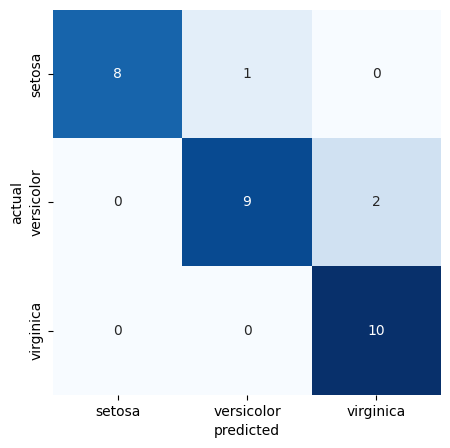

In [21]:
#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(test_class,mlp_y_pred3)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_xticklabels(['setosa','versicolor','virginica'])
ax.set_yticklabels(['setosa','versicolor','virginica'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

- The 3rd model has two hidden layers with 40 neurons in each layer. The rest is the same as the first model. The model is trained for 200 epochs. As it is shown above the accuracy, precision and recall of the third model is slightly worse. This can be result of overfitting since model is more complex than the others.

## Decision Tree

The class below is a single node of the tree, which contains the following attributes:
- **feature**: the feature which is used to split the data
- **threshold**: the threshold which is used to split the data
- **left**: the left child of the node
- **right**: the right child of the node
- **label**: the class label of the node
- **leaf**: A boolean indicating if the node is a leaf or not

In [22]:
class Node:
    def __init__(self, feature,threshold ,label,leaf=False):
        self.feature = feature
        self.label = label
        self.threshold = threshold
        self.leaf = leaf
        self.left = None
        self.right = None

In [23]:
# Decision Tree class
class Decision_Tree:
    #create the tree
    def __init__(self, X, y,min_threshold=0.001):
        # contacate the X and y
        self.data = np.concatenate((X,y.reshape(-1,1)),axis=1)
        self.min_threshold = min_threshold

    def __impurity(self, data):
        classes = np.unique(data[:,-1])
        impurity = 0
        for c in classes:
            p = np.sum(data[:,-1]==c)/data.shape[0]
            impurity -= p*np.log2(p)
        return impurity
    
    # calculatiing the impurity difference
    def __impurity_diff(self, data, feature, threshold):
        left = data[data[:,feature] < threshold]
        right = data[data[:,feature] >= threshold]
        p = left.shape[0]/data.shape[0]
        return self.__impurity(data) - p*self.__impurity(left) - (1-p)*self.__impurity(right)
    
    # finding the best feature and threshold
    def __best_split_Tree(self, data):
        max_diff = 0
        best_feature = -1
        best_threshold = 0
        for feature in range(data.shape[1]-1):
            for threshold in data[:,feature]:
                diff = self.__impurity_diff(data, feature, threshold)
                if diff > max_diff:
                    max_diff = diff
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold
    
    # training the tree
    def train(self):
        self.root = self.__build_tree(self.data)

    # building the tree
    def __build_tree(self, data):
        if self.__impurity(data) <= self.min_threshold:
            return Node(None, None,np.argmax(np.bincount(data[:,-1].astype(int))),leaf=True)
        else:
            feature, threshold = self.__best_split_Tree(data)
            node = Node(feature, threshold ,None, leaf=False)
            left = data[data[:,feature] < threshold]
            right = data[data[:,feature] >= threshold]
            node.left = self.__build_tree(left)
            node.right = self.__build_tree(right)
            return node
    
    # predicting a single data
    def __predict(self, data, node):
        if node.leaf:
            return node.label
        else:
            if data[node.feature] < node.threshold:
                return self.__predict(data, node.left)
            else:
                return self.__predict(data, node.right)

    # predicting the whole data
    def predict(self, data):
        y_pred = []
        for d in data:
            y_pred.append(self.__predict(d, self.root))
        return np.array(y_pred)
    


In [24]:
desicion_tree = Decision_Tree(train_set, train_class,min_threshold=0.001)
desicion_tree.train()
y_pred_dt = desicion_tree.predict(test_set)


In [25]:
print(classification_report(test_class,y_pred_dt,target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.90      0.82      0.86        11
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



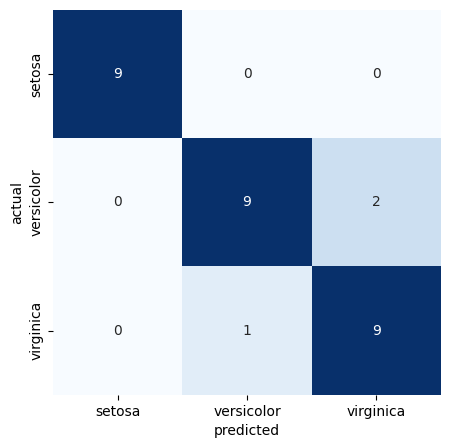

In [26]:
#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(test_class,y_pred_dt)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_xticklabels(['setosa','versicolor','virginica'])
ax.set_yticklabels(['setosa','versicolor','virginica'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

### Desiction Tree Class
- The class has data field which contains both features and labels. Also it has a root node which is root of the Tree.
- The class has 2 public methods
- - **train**: which trains the model using build_tree function
- - - **build_tree**: which builds the tree recursively. In each step the best feature and threshold is found using **best_split_tree** function. Then the data is splitted using these two factors with calculating its entropy.
- - predict : which predicts the labels of the data like binary search.

- As it is demostrated above desicion tree class has slighty worse performance than MLP model. However its training time is much lower than the other MLP models. Its accruacy, precision and recall are lower.

### pros and cons of Non-linear classifiers
- Non-linear classifiers have more complex boundaries than the linear ones. They can understand correlation between many features. Hence they can classify data better than linear classifiers. Although they have a high computational cost and they need huge amount of data to get trained Which makes them prone to overfitting.

## AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier
# import hard svm from sklearn
from sklearn.svm import SVR


AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=5) 
AdaBoost.fit(train_set, train_class)
y_pred_ada = AdaBoost.predict(test_set)

In [28]:
print(classification_report(test_class,y_pred_ada,target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.82      0.90        11
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



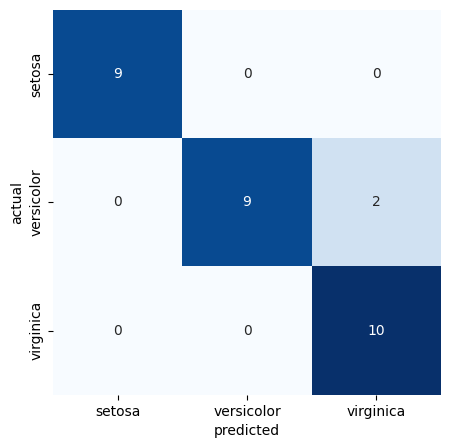

In [29]:
#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(test_class,y_pred_ada)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_xticklabels(['setosa','versicolor','virginica'])
ax.set_yticklabels(['setosa','versicolor','virginica'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

- As it's demonstrated above AdaBoost Algorithm can classify data extremely accurate compared to other models(descision Tree, SLP). It has a high accuracy, precision and recall score. Its training time is lower than MLP models.

## Majority voiting and Weighted voiting

In [30]:
# majority voting
y_pred_combined = np.array([mlp_y_pred,y_pred_dt,y_pred_ada,y_pred])
y_pred_combined = np.transpose(y_pred_combined)
y_pred_majority = np.array([])
for i in range(y_pred_combined.shape[0]):
    y_pred_majority = np.append(y_pred_majority,np.argmax(np.bincount(y_pred_combined[i].astype(int))))

print(classification_report(test_class,y_pred_majority,target_names=['setosa','versicolor','virginica']))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.90      0.82      0.86        11
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



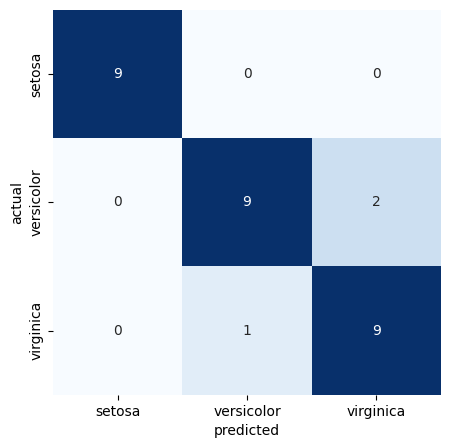

In [31]:
#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(test_class,y_pred_majority)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_xticklabels(['setosa','versicolor','virginica'])
ax.set_yticklabels(['setosa','versicolor','virginica'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

- since AdaBoost and decision tree classifiers have better results, their weight is higher than the other classifiers.

In [32]:
# weighted voting
y_pred_weighted = np.array([])
#y_pred_combined = np.array([mlp_y_pred,y_pred_dt,y_pred_ada,y_pred])
weights=[0.2,0.3,0.40,0.10]
for i in range(y_pred_combined.shape[0]):
    y_pred_weighted = np.append(y_pred_weighted,np.argmax(np.bincount((y_pred_combined[i].astype(int)),weights=weights)))

print(classification_report(test_class,y_pred_weighted,target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.82      0.90        11
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



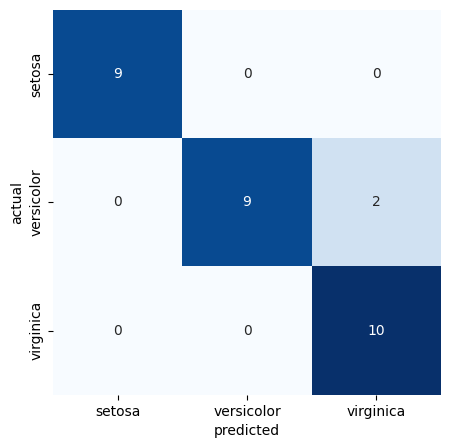

In [33]:
#plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(test_class,y_pred_weighted)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_xticklabels(['setosa','versicolor','virginica'])
ax.set_yticklabels(['setosa','versicolor','virginica'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

two of the training datas are always missclassified by all the models. therefore the accuracy of the model can't be improved by majority voiting or weighted voiting. However with different test set, These two models have better performance.
Weighted voiting in general for this case has a better performance than majority voiting. Because it gives more weight to the better models.